<h1>THÊM THƯ VIỆN</h1>
pip install pmdarima -- Cài đặt thư viện

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h1>NẠP DỮ LIỆU</h1>

In [2]:
data = pd.read_csv("../../dataset/HBAN.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,3.71,3.74,3.65,3.68,2.454023,10462800
1,2010-01-05,3.68,3.77,3.65,3.76,2.507371,21226600
2,2010-01-06,3.75,3.89,3.72,3.86,2.574056,18761000
3,2010-01-07,3.85,4.35,3.83,4.29,2.860804,66130600
4,2010-01-08,4.23,4.37,4.13,4.22,2.814123,29869600
...,...,...,...,...,...,...,...
3370,2023-05-24,10.39,10.50,10.29,10.36,10.360000,9415100
3371,2023-05-25,10.22,10.44,10.20,10.42,10.420000,10914500
3372,2023-05-26,10.42,10.53,10.28,10.52,10.520000,8903100
3373,2023-05-30,10.55,10.66,10.36,10.63,10.630000,10769700


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3375 non-null   object 
 1   Open       3375 non-null   float64
 2   High       3375 non-null   float64
 3   Low        3375 non-null   float64
 4   Close      3375 non-null   float64
 5   Adj Close  3375 non-null   float64
 6   Volume     3375 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 184.7+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3375 non-null   datetime64[ns]
 1   Open       3375 non-null   float64       
 2   High       3375 non-null   float64       
 3   Low        3375 non-null   float64       
 4   Close      3375 non-null   float64       
 5   Adj Close  3375 non-null   float64       
 6   Volume     3375 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 184.7 KB


In [5]:
for i in range(len(data["Date"])):
      data["Date"][i]= data["Date"][i].strftime('%Y-%m-%d')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,3.71,3.74,3.65,3.68,2.454023,10462800
1,2010-01-05,3.68,3.77,3.65,3.76,2.507371,21226600
2,2010-01-06,3.75,3.89,3.72,3.86,2.574056,18761000
3,2010-01-07,3.85,4.35,3.83,4.29,2.860804,66130600
4,2010-01-08,4.23,4.37,4.13,4.22,2.814123,29869600
...,...,...,...,...,...,...,...
3370,2023-05-24,10.39,10.50,10.29,10.36,10.360000,9415100
3371,2023-05-25,10.22,10.44,10.20,10.42,10.420000,10914500
3372,2023-05-26,10.42,10.53,10.28,10.52,10.520000,8903100
3373,2023-05-30,10.55,10.66,10.36,10.63,10.630000,10769700


In [6]:
data.set_index('Date',inplace=True)

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3.375000e+03
mean,10.750803,10.878456,10.612382,10.746607,8.702893,1.253421e+07
std,3.448555,3.474243,3.418287,3.446404,3.547444,8.509738e+06
min,3.680000,3.740000,3.650000,3.680000,2.454023,2.175000e+06
25%,7.480000,7.565000,7.380000,7.490000,5.294533,8.022100e+06
50%,10.570000,10.660000,10.410000,10.560000,8.187997,1.061570e+07
75%,13.850000,14.010000,13.690000,13.855000,11.750246,1.439070e+07
max,17.709999,17.790001,17.309999,17.629999,16.622715,1.617461e+08


<h1>DATA ANALYSIS</h1>

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Low,
                    mode='lines',
                    name='Low',
                    marker_color = '#D62728',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Open,
                    mode='lines',
                    name='Open',
                    marker_color = '#FF7F0E',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))

fig.update_layout(
    title='Microsoft history',
    titlefont_size = 28,
    
    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    
    height = 800,
    
    yaxis=dict(
        title='Prices',
        titlefont_size=16,
        tickfont_size=14),
    
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

<Axes: title={'center': 'Biến động giá cổ phiếu'}, xlabel='Dates', ylabel='Dollars'>

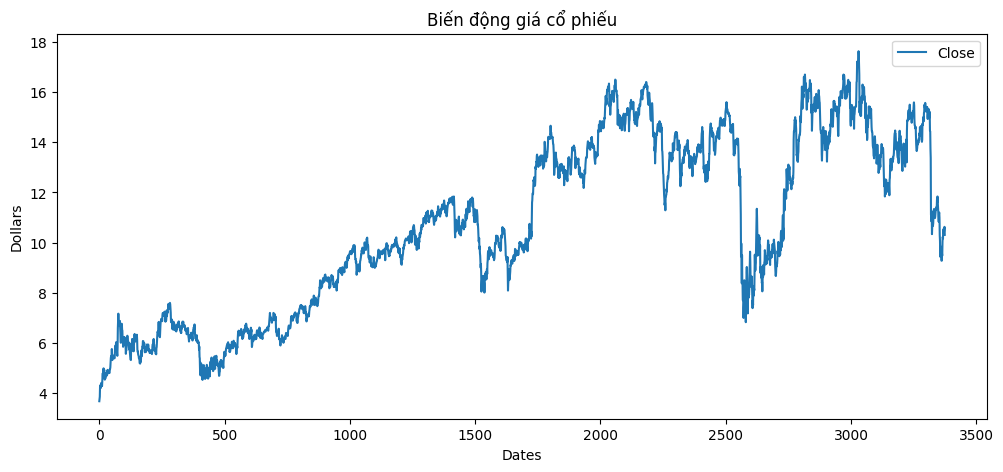

In [9]:
df = data[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

title ='Biến động giá cổ phiếu'
ylabel='Dollars'
xlabel='Dates'
df.plot(figsize=(12,5),title=title,xlabel=xlabel, ylabel=ylabel)

In [10]:
# 2. chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

<h1>XÂY DỰNG MÔ HÌNH ARIMA</h1>
<h3>Dựa vào chỉ số AIC</h3>
Chỉ số AIC càng thấp thì mô hình càng phù hợp

In [11]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Sử dụng hàm auto_arima để tìm kiếm mo hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1893.742, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1897.063, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1896.401, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1896.429, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1896.044, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1896.791, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.480 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [12]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [13]:
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [14]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[15.51584485 15.52168969 15.52753454 15.53337939 15.53922423 15.54506908
 15.55091393 15.55675877 15.56260362 15.56844847 15.57429332 15.58013816
 15.58598301 15.59182786 15.5976727  15.60351755 15.6093624  15.61520724
 15.62105209 15.62689694 15.63274178 15.63858663 15.64443148 15.65027632
 15.65612117 15.66196602 15.66781086 15.67365571 15.67950056 15.6853454 ]


In [15]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mae = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('MAE:', mae)
print('MAPE:', mape)

Validation RMSE: 4.144499115164361
Testing RMSE: 5.403785887929522
MAE: 4.2710461124805255
MAPE: 39.46021091525962


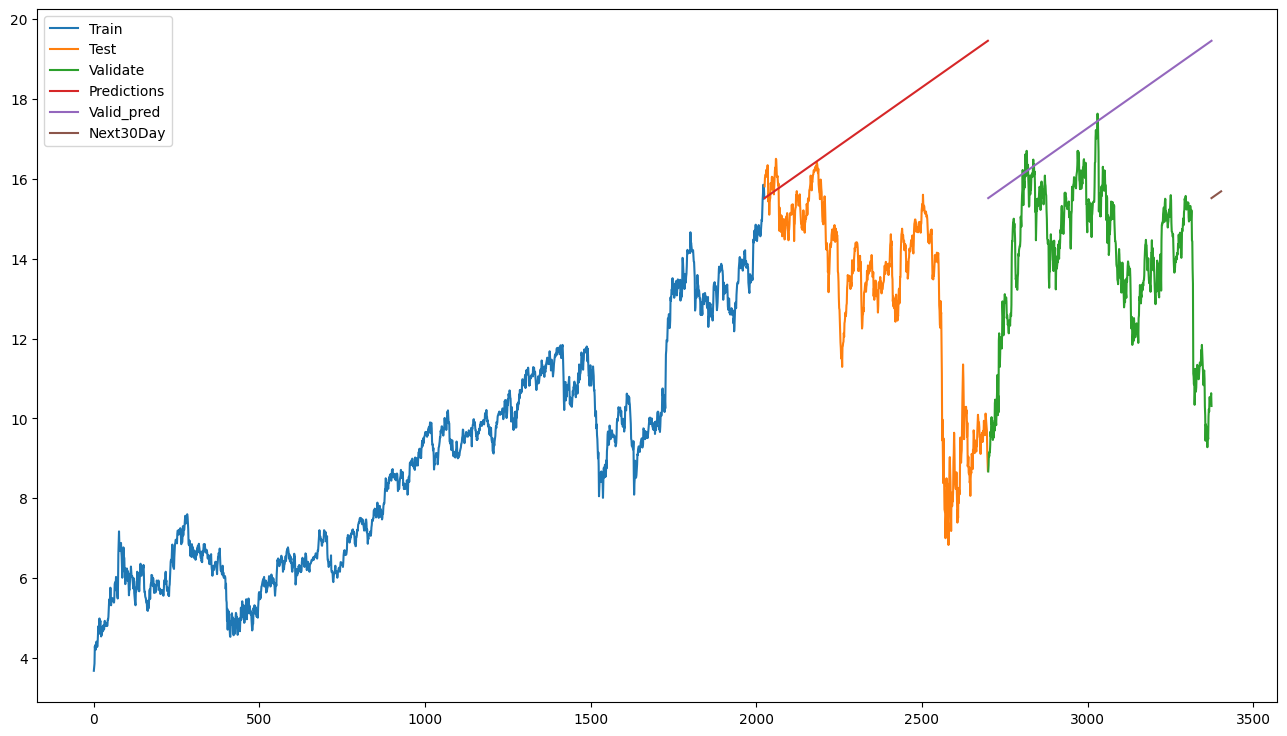

In [16]:
# 8.Vẽ hình
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next30Day'])
plt.show()

In [17]:
test_data.index

RangeIndex(start=2025, stop=2700, step=1)